In [9]:
# import packages
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [16]:
### FEDERALIST PAPERS ###
# import data
fed_paper = pd.read_csv("fedPapers85.csv")
# remove 2nd column
del fed_paper["filename"]
# duplicate data to replace Names column with numbers
fed_paper2 = fed_paper.replace({'Hamilton': 1, 'Madison': 2, 'Jay': 3, 'HM':4, 'dispt':5})
# create variables containing the predictive variables x and the variable to be predicted y
fed_x = fed_paper2.drop(['author'],axis=1)
fed_x_train = fed_x[12:]
fed_x_test = fed_x[0:11]
fed_y = fed_paper2['author']
fed_y_train = fed_y[12:]
fed_y_test = fed_y[0:11]
# test and train data
fed_paper_test = fed_paper2[0:11]
fed_paper_train = fed_paper2[12:]

# just values
fed_values = fed_paper2.values
fed_values

# Note that, unlike in R, there is no complexity parameter (CP) in the python DT library.
# Also note we cannot test the accuracy of this model, since we do not actually know the disputed authors.

array([[5.   , 0.28 , 0.052, ..., 0.087, 0.192, 0.   ],
       [5.   , 0.177, 0.063, ..., 0.063, 0.139, 0.   ],
       [5.   , 0.339, 0.09 , ..., 0.045, 0.068, 0.   ],
       ...,
       [2.   , 0.177, 0.052, ..., 0.099, 0.021, 0.   ],
       [2.   , 0.243, 0.091, ..., 0.061, 0.023, 0.   ],
       [2.   , 0.347, 0.097, ..., 0.083, 0.083, 0.   ]])

In [15]:
# determine the author using a decision tree classifier 
dtc = DecisionTreeClassifier()
dtc_train = dtc.fit(fed_x_train, fed_y_train)
dtc_predict = dtc.predict(fed_x_test)
dtc_predict
# the decision tree predicts Madison as the author.

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [14]:
# determine the author using a decision tree regressor
dtr = DecisionTreeRegressor()
dtr_train = dtr.fit(fed_x_train, fed_y_train)
dtr_predict = dtc.predict(fed_x_test)
dtr_predict
# also Madison

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

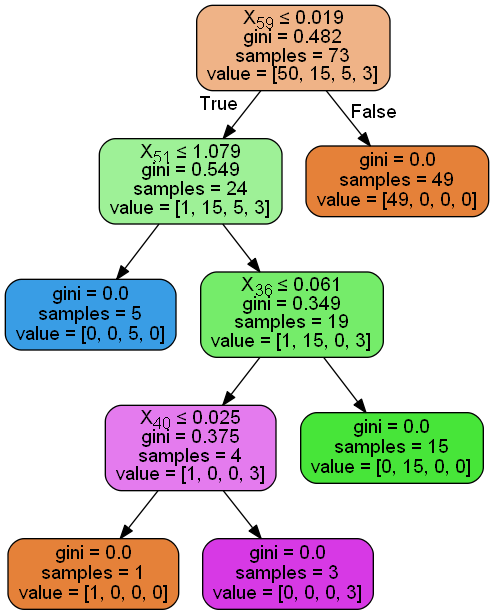

In [13]:
# Visualize the decision trees
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [7]:
# additional pruning

In [ ]:
### DIGIT RECOGNIZER ###